In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
dataset = pd.read_csv('heart-disease ITP.csv')

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset=dataset.drop_duplicates()
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
target_values=dataset["target"].value_counts()
target_values

target
1    164
0    138
Name: count, dtype: int64

# visualizations

### Analyzing gender with disease using pie chart visualizations


Text(0.5, 1.0, 'No Heart Disease')

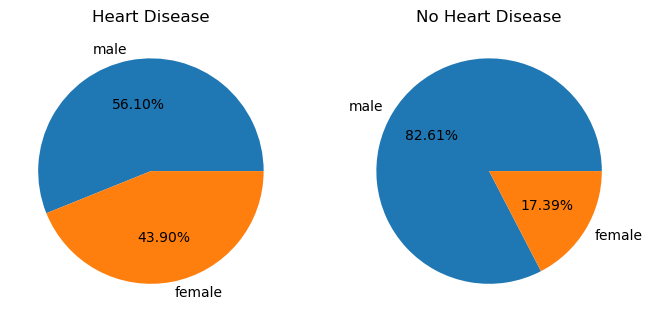

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(121)
male_heart_disease=len(dataset[(dataset["sex"]==1)&(dataset["target"]==1)])
female_heart_disease=len(dataset[(dataset["sex"]==0)&(dataset["target"]==1)])
plt.pie([male_heart_disease,female_heart_disease],labels=["male","female"],autopct='%1.2f%%');
plt.title("Heart Disease")

plt.subplot(122)
male_heart_nodisease=len(dataset[(dataset["sex"]==1)&(dataset["target"]==0)])
female_heart_nodisease=len(dataset[(dataset["sex"]==0)&(dataset["target"]==0)])
plt.pie([male_heart_nodisease,female_heart_nodisease],labels=["male","female"],autopct='%1.2f%%');
plt.title("No Heart Disease")

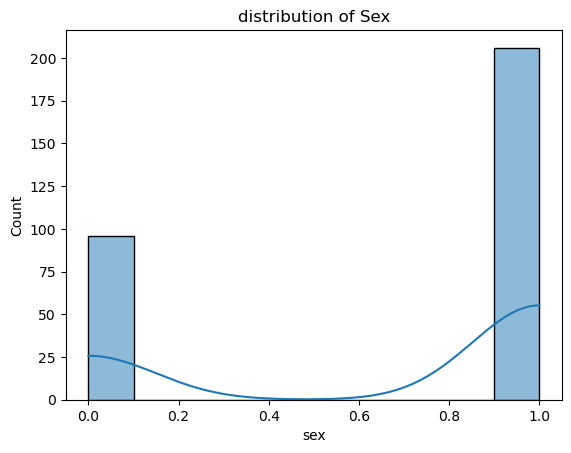

In [ ]:
sns.histplot(x='sex', kde=True, data=dataset)
plt.title("distribution of Sex")
plt.show()


<Axes: xlabel='fbs', ylabel='slope'>

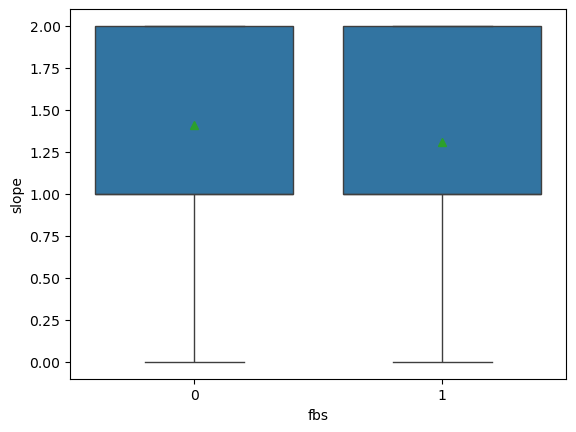

In [ ]:
sns.boxplot(x='fbs',y='slope',showmeans=True,data=dataset)

<Axes: xlabel='cp', ylabel='count'>

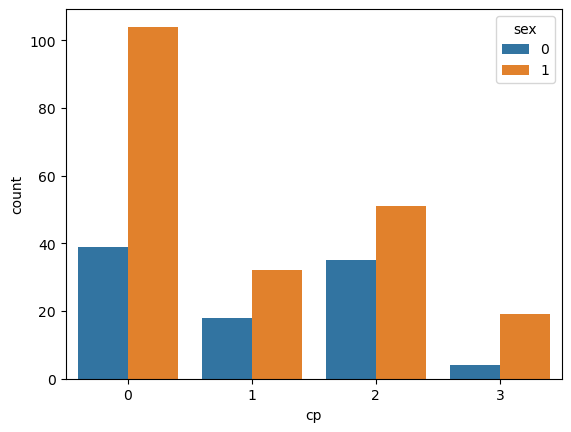

In [ ]:
sns.countplot(x='cp',hue='sex',data=dataset)

sex
1    206
0     96
Name: count, dtype: int64


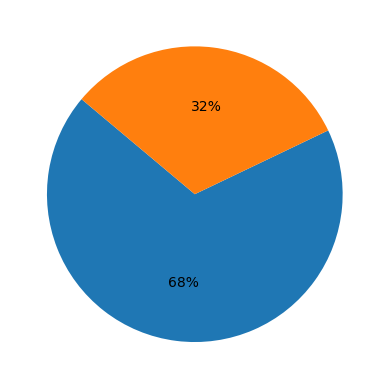

In [ ]:
bp=dataset['sex'].value_counts()
print(bp)
plt.pie(bp,autopct='%1.0f%%',startangle=140)
plt.show()

<Axes: ylabel='oldpeak'>

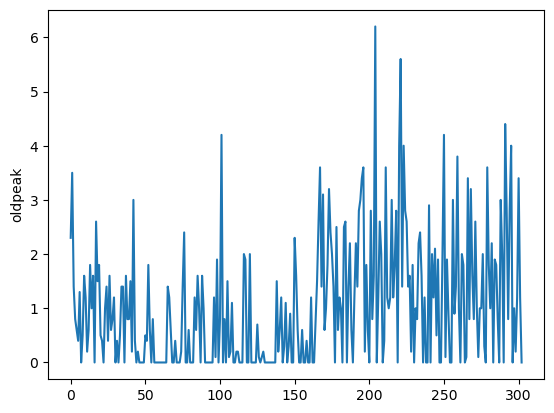

In [ ]:
sns.lineplot(dataset['oldpeak'])

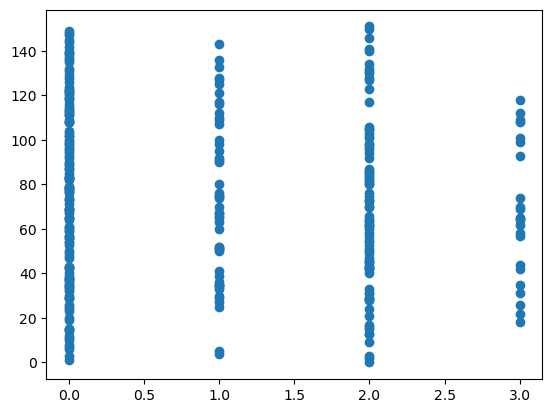

In [ ]:
plt.scatter(dataset['cp'],dataset['chol'])
plt.show()

<BarContainer object of 302 artists>

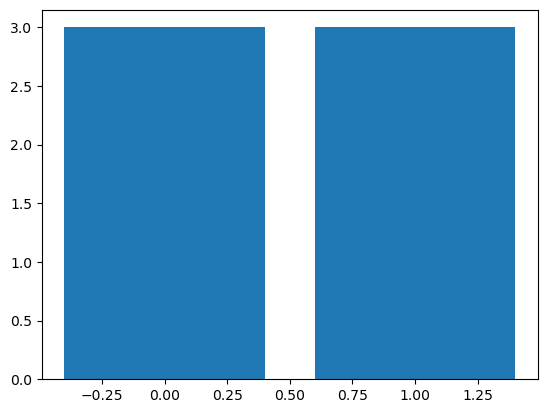

In [ ]:
plt.bar(dataset['exang'],dataset['thal'])

# labelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for col in columns:
    dataset[col] = le.fit_transform(dataset[col])
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3,0
299,11,1,3,8,93,0,1,32,0,12,1,0,3,0
300,34,1,0,30,26,1,1,40,0,31,1,2,3,0
301,23,1,0,22,1,0,1,16,1,12,1,1,3,0


In [ ]:
cor=dataset.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.093342,-0.064454,0.287153,0.199486,0.120966,-0.115942,-0.393268,0.091569,0.216664,-0.164485,0.302296,0.067021,-0.223301
sex,-0.093342,1.000000,-0.051740,-0.055345,-0.158902,0.046022,-0.060351,-0.046527,0.143460,0.107278,-0.032990,0.113060,0.211452,-0.283609
cp,-0.064454,-0.051740,1.000000,0.053421,-0.087045,0.096018,0.041561,0.296922,-0.392937,-0.140640,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.287153,-0.055345,0.053421,1.000000,0.141774,0.168339,-0.118311,-0.047184,0.055208,0.177417,-0.106087,0.104312,0.049254,-0.133751
chol,0.199486,-0.158902,-0.087045,0.141774,1.000000,0.015418,-0.141573,-0.026347,0.085562,0.038649,0.005501,0.103518,0.095533,-0.111482
fbs,0.120966,0.046022,0.096018,0.168339,0.015418,1.000000,-0.083081,-0.005090,0.024729,0.011448,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.115942,-0.060351,0.041561,-0.118311,-0.141573,-0.083081,1.000000,0.051092,-0.068807,-0.060062,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.393268,-0.046527,0.296922,-0.047184,-0.026347,-0.005090,0.051092,1.000000,-0.390880,-0.366108,0.391523,-0.232935,-0.099917,0.422747
exang,0.091569,0.143460,-0.392937,0.055208,0.085562,0.024729,-0.068807,-0.390880,1.000000,0.297152,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.216664,0.107278,-0.140640,0.177417,0.038649,0.011448,-0.060062,-0.366108,0.297152,1.000000,-0.577868,0.227713,0.207684,-0.435118


<Axes: >

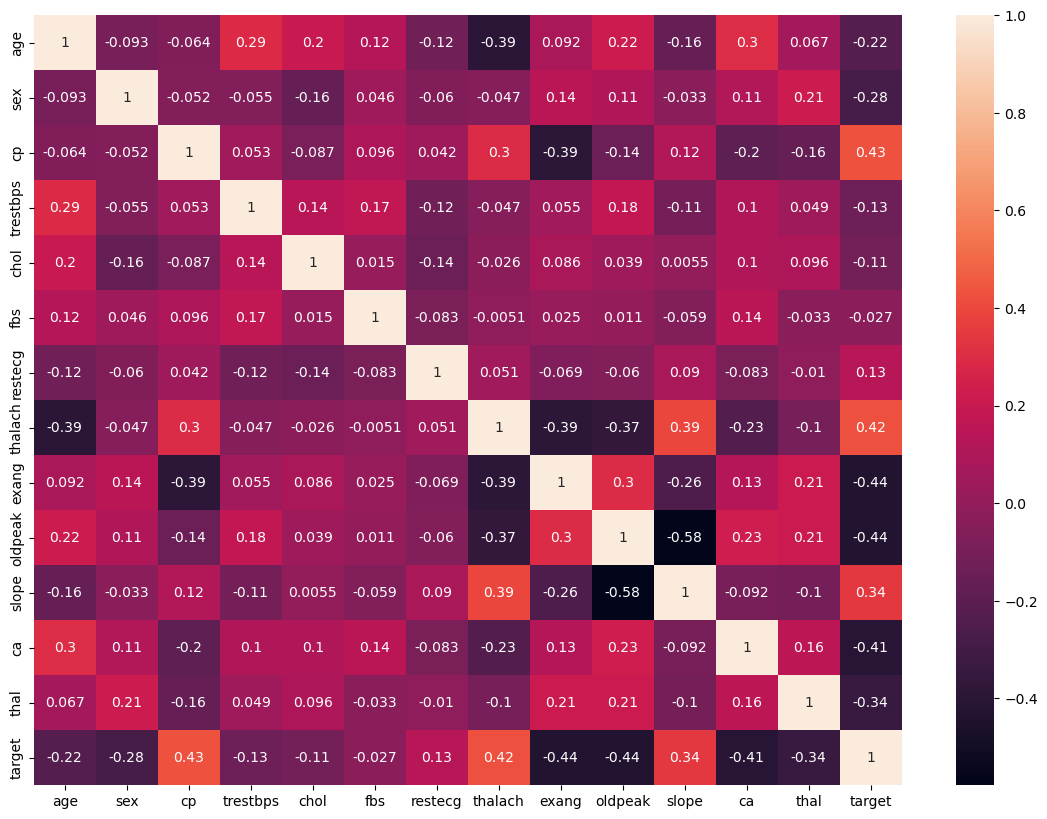

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(cor,annot=True)

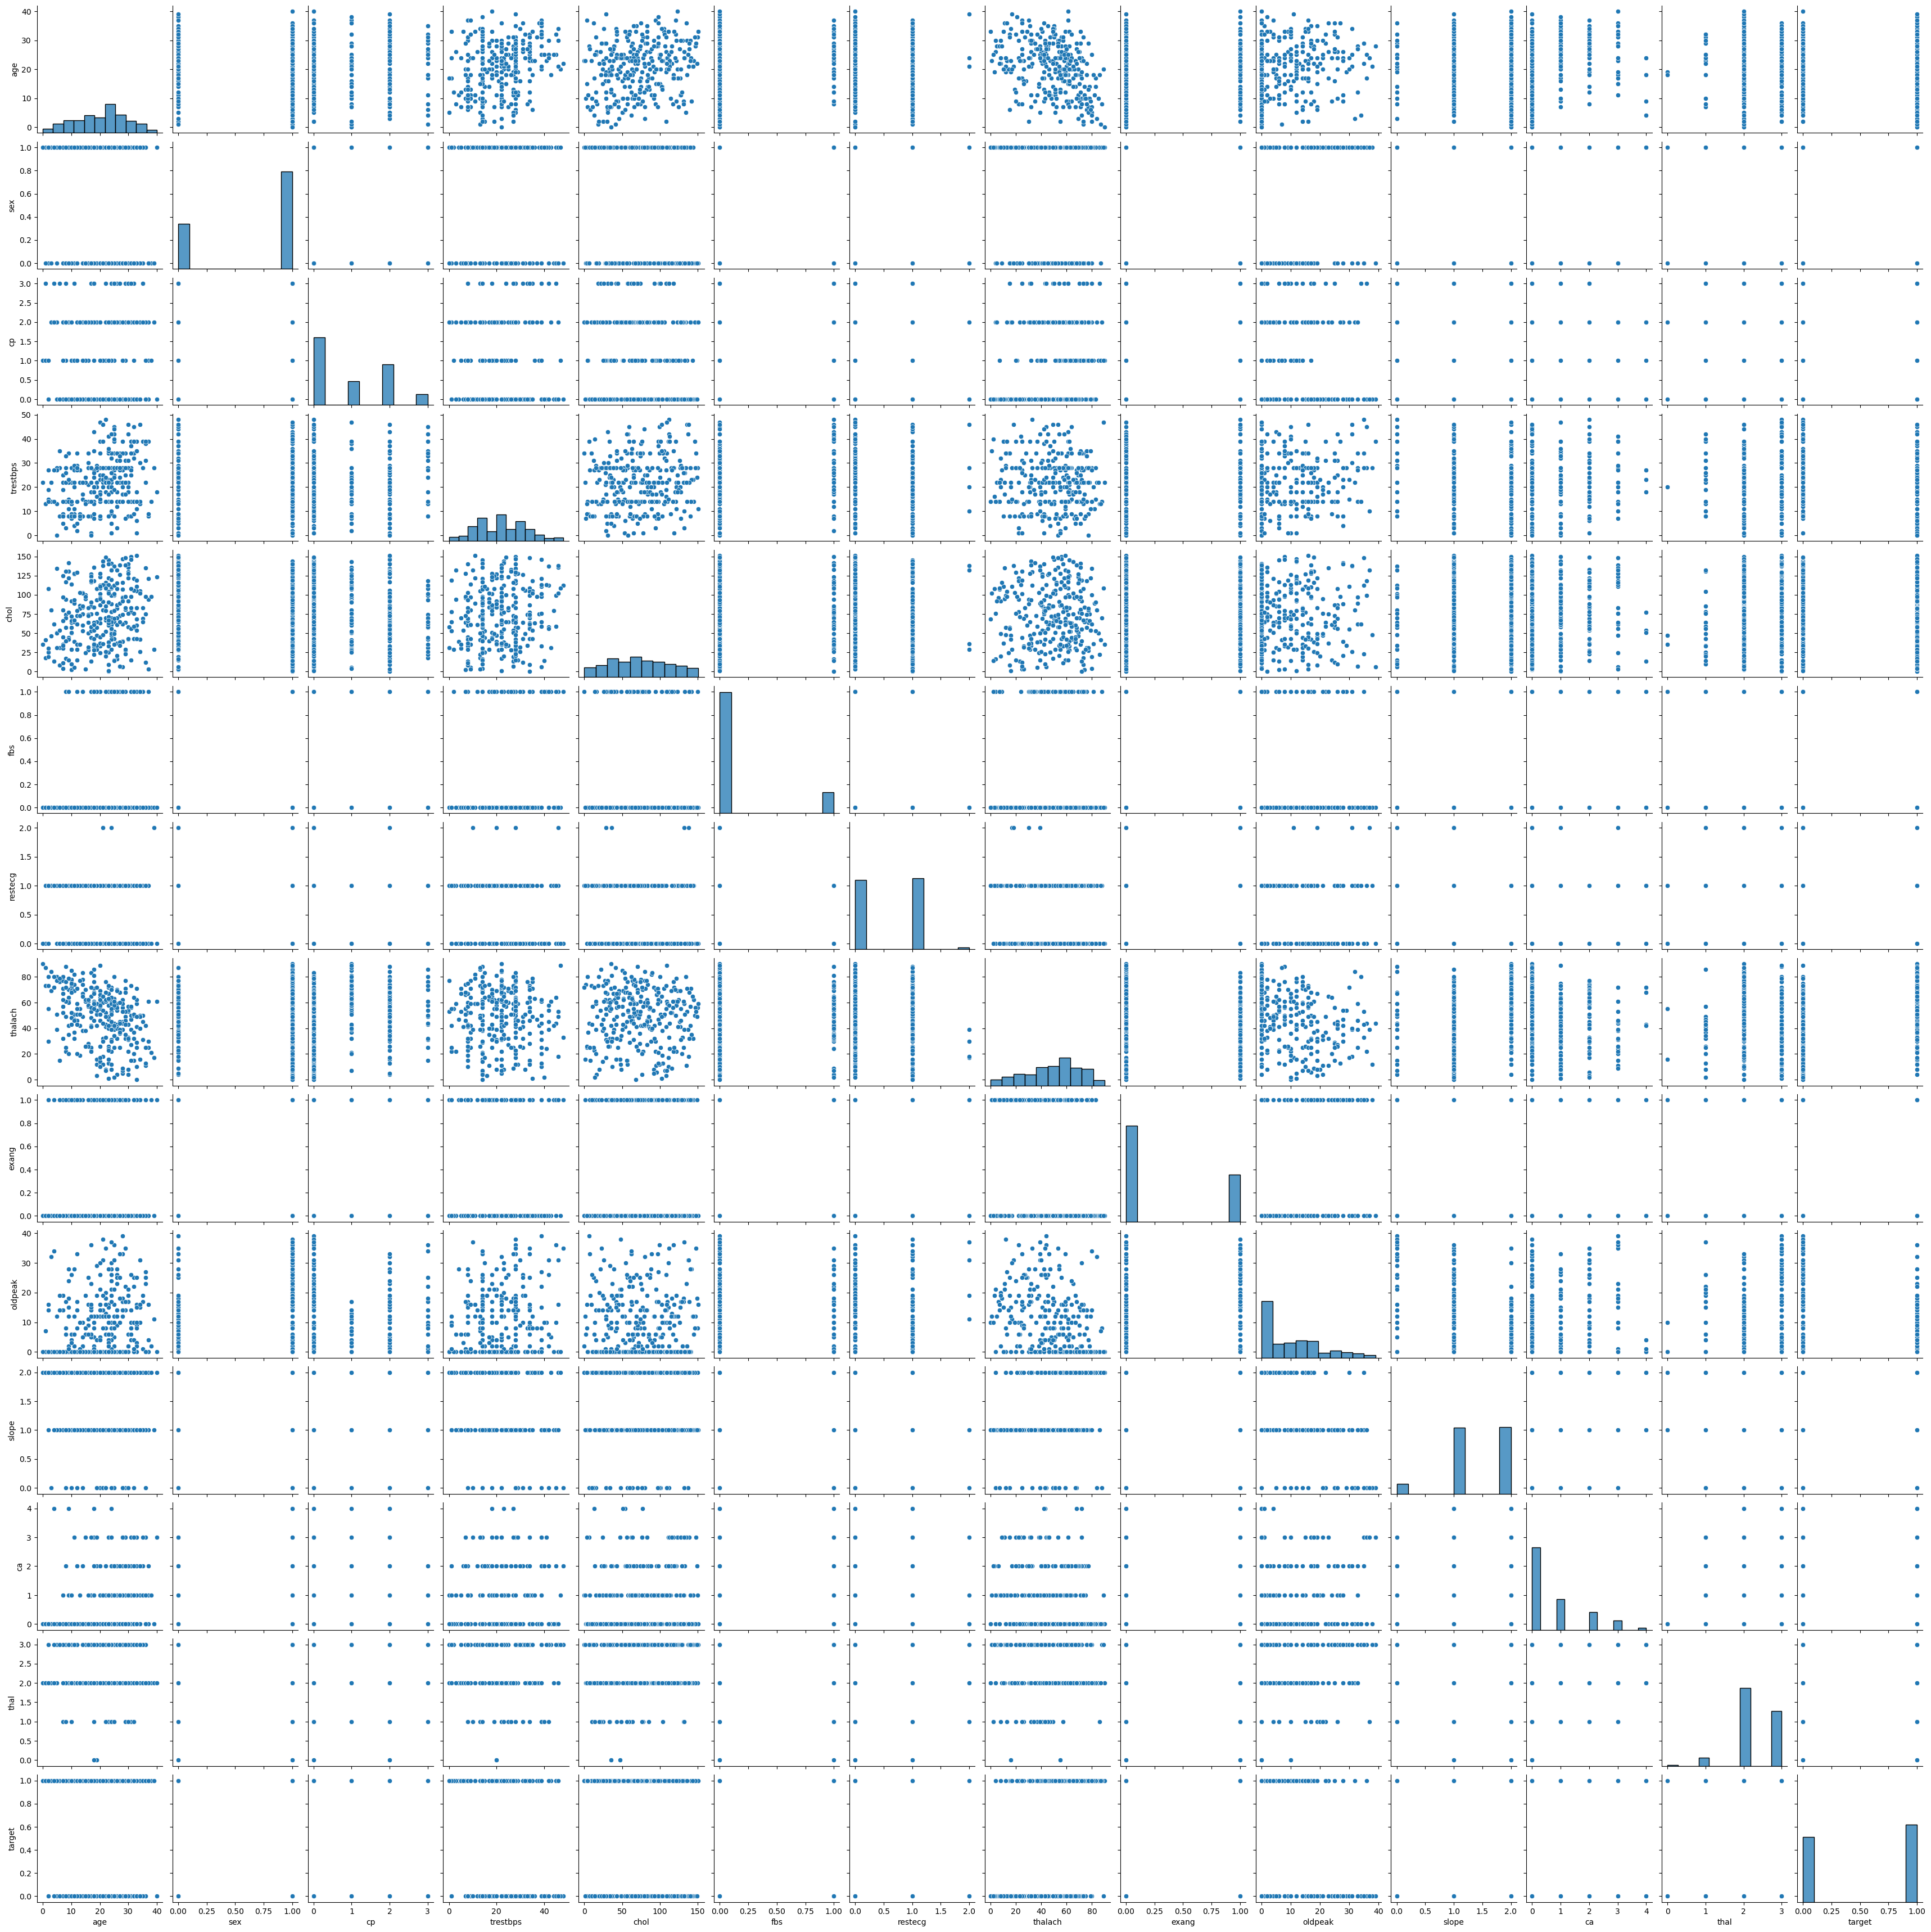

In [ ]:
sns.pairplot(dataset)

In [ ]:
x=dataset.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1,3,31,64,1,0,49,0,22,0,0,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2
2,7,0,1,22,35,0,0,71,0,14,2,0,2
3,22,1,1,14,67,0,1,76,0,8,2,0,2
4,23,0,0,14,145,0,1,62,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3
299,11,1,3,8,93,0,1,32,0,12,1,0,3
300,34,1,0,30,26,1,1,40,0,31,1,2,3
301,23,1,0,22,1,0,1,16,1,12,1,1,3


In [ ]:
y=dataset.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [ ]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test

226    0
152    1
229    0
202    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [ ]:
acc_score=accuracy_score(y_test,y_pred)
print("accuracy of the model is:",acc_score*100)


accuracy of the model is: 88.52459016393442


In [ ]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cnf_matrix)

confusion matrix:
 [[23  4]
 [ 3 31]]


In [ ]:
report=classification_report(y_test,y_pred)
print("classification report:\n",report)

classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

